In [1]:
import MDAnalysis
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import math
import os
import sys
import statistics
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from pylab import *
from tqdm import tqdm


/home/mescalin/kgutenbrunner/.conda/envs/MDanalysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_folder = '/scr/aldea/kgutenbrunner/github/MA/MD/TBFV/img'

## basepair distance

In [3]:
def get_pairwise_distances(dcd_file, pdb_file, movie_skip):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    pairwise_distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        pairwise_distances.append([])
        positions = selection.center(None, compound="residues")

        for i, pos_i in enumerate(positions):
            pairwise_distances[t].append([])
            for j, pos_j in enumerate(positions):
                if i > j:
                    pairwise_distances[t][i].append(pairwise_distances[t][j][i])
                else:
                    pairwise_distances[t][i].append(np.linalg.norm(pos_j-pos_i))

    return pairwise_distances


In [4]:
def get_bp_distance(dcd_file, pdb_file, movie_skip, bp):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        positions = selection.center(None, compound="residues")
        pos_i = positions[bp[0]]
        pos_j = positions[bp[1]]
        distances.append(np.linalg.norm(pos_j-pos_i))

    return distances


In [5]:
def remove_comments(lines):
    cleaned = [line for line in lines if line[0].isnumeric()]
    return cleaned

def get_steps(foldername, gradient):
    outLines = []
    inF = open(f"{foldername}/out{gradient}_1_1.txt", 'r')

    outLines.append("Step ")
    lines = remove_comments(inF.readlines())

    start = int(lines[0][0:lines[0].find(',')])
    step = int(lines[1][0:lines[1].find(',')]) - int(lines[0][0:lines[0].find(',')])
    inF.close()

    return start, step


def calculate_endforce(foldername, distances, ):
    end_force = ((len(distances)*movie_skip*step_interval*2)/1000000000) * gradient
    return end_force

# DTV

In [6]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/TBFV/DTV_grad/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'


step_start, step_interval = get_steps(foldername, gradient)


In [7]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


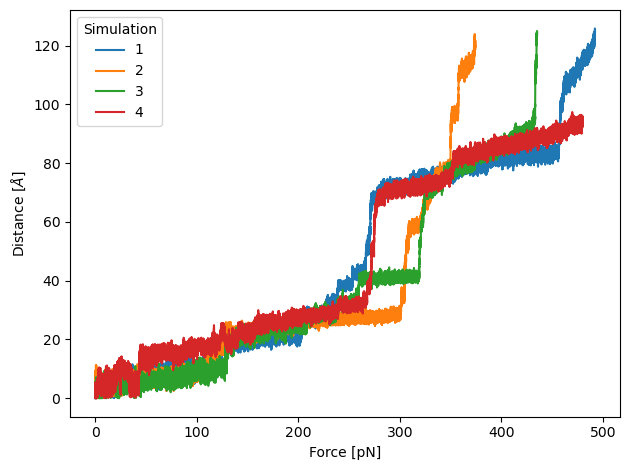

In [9]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'DTV_grad_distances_5end.png')
plt.tight_layout()
plt.savefig(save_under)

# Designs

## Design 9

In [17]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/TBFV/designs/design9_opt_grad/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'


step_start, step_interval = get_steps(foldername, gradient)


In [18]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


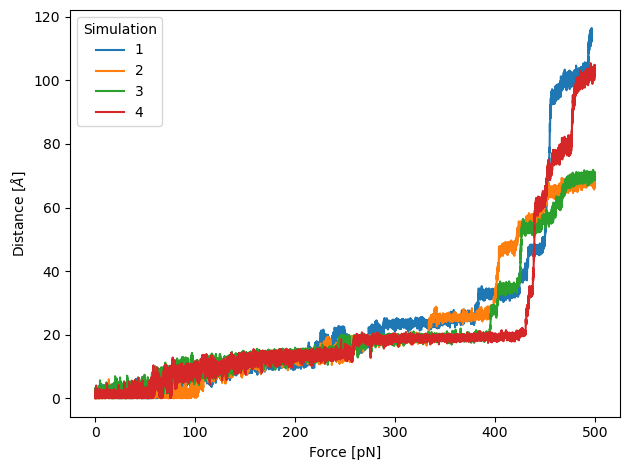

In [19]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'TBFV_design9_distances_5end.png')
plt.tight_layout()
plt.savefig(save_under)

## Design 8

In [29]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/TBFV/designs/design8_opt_grad/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'


step_start, step_interval = get_steps(foldername, gradient)


In [30]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


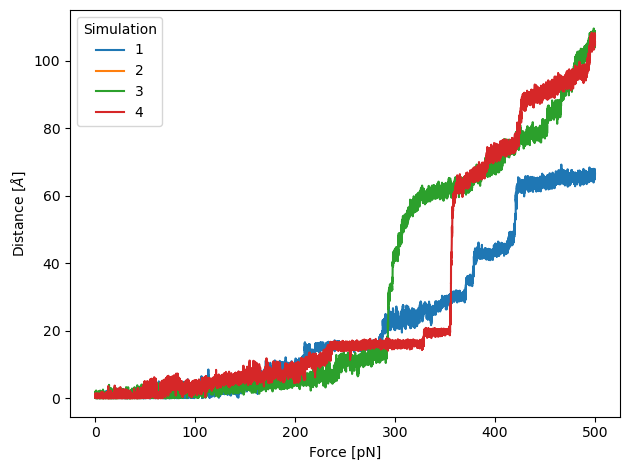

In [31]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'DTV_grad_distances_5end.png')
plt.tight_layout()
#plt.savefig(save_under)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


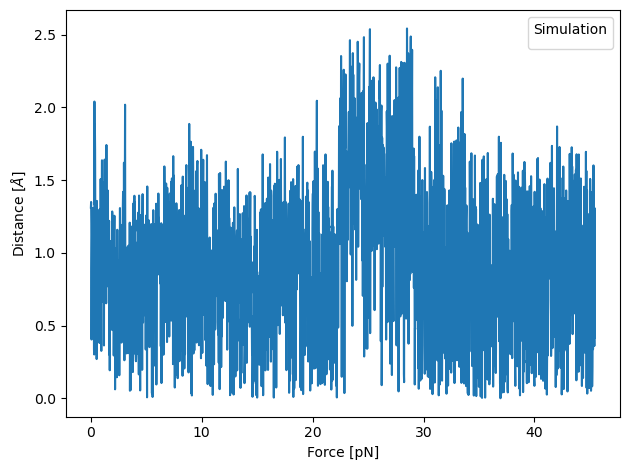

In [32]:
distance = distances_analysis[2]
end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:])

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'DTV_grad_distances_5end.png')
plt.tight_layout()
#plt.savefig(save_under)

In [27]:
len(distance)

8922

In [28]:
len(distances_analysis[1])

25000